# Introducción a la inferencia causal con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](https://relopezbriega.github.io/cv/) en [Matemáticas, Analisis de datos y Python](https://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Introducción a la inferencia causal con Python" title="Introducción a la inferencia causal con Python" src="https://relopezbriega.github.io/images/causal.jpg" >

> "...lo que llamamos azar es nuestra ignorancia de la compleja maquinaria de la causalidad"

**[Jorge Luis Borges](https://es.wikipedia.org/wiki/Jorge_Luis_Borges)**

## Introducción

<strong><span style="font-size:16px;">¿Por qué?</span></strong>...Esta eterna pregunta es una de las más fundamentales. La solemos formular incontables veces al día! El ser humano parece tener una infinita curiosidad por entender el por qué pasan las cosas, y nuestro cerebro parece estar especialmente diseñado para encontrar esas causas...o inventarlas.

La [causalidad](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)) es la conexión más fundamental en el universo. Sin ella, no hay responsabilidad moral: ninguno de nuestros pensamientos estaría relacionado con nuestras acciones y ninguna de nuestras acciones con consecuencias. Tampoco tendríamos un sistema legal porque la culpa reside solo en alguien que ha causado lesiones o daños. No habría ciencia ni tecnología. 

[Richard feynman](https://es.wikipedia.org/wiki/Richard_Feynman) definía a la Ciencia como un método para intentar responder preguntas del tipo <em>"Si hago esto, ¿qué pasará?"</em>. Ciencia no es sobre belleza, verdad, justicia, sabiduría o ética; es algo eminemente práctico. Es sobre realizar experimentos, probar, ver los resultados y adquirir la mayor cantidad información de esas experiencias. Desde pequeños, aprendemos que el mundo no está compuesto solo de datos o hechos; sino que éstos hechos están interconectados por una intrincada red de relaciones de <em>causa-efecto</em>.
Cualquier intervención que hagamos en el mundo que nos rodea se basa en la existencia de conexiones causales que son al menos predecibles en cierto grado. Es la [causalidad](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)) la base de esta predicción y también la explicación.


## Escalera del pensamiento causal

Según [Judea Pearl](https://es.wikipedia.org/wiki/Judea_Pearl), uno de los padres de la formalización del razonamiento [causal](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)), nuestra habilidad para organizar el conocimiento sobre el mundo que nos rodea en <em>causas y efectos</em>, se basa en 3 habilidades cognitivas: <strong><em>ver, hacer e imaginar</em></strong>. Para explicar como estas habilidades nos ayudan a construir las explicaciones causales, recurre a la metáfora de una escalera. 

<img alt="Introducción a la inferencia causal con Python" title="Introducción a la inferencia causal con Python" src="https://relopezbriega.github.io/images/Causal.png" >

El primero escalón, <strong><em>ver u observar</em></strong>, implica la detección de regularidades en nuestro ambiente y es compartida por muchos animales. El segundo escalón, <strong><em>hacer</em></strong>, implica predecir el (los) efecto (s)
de alteraciones deliberadas del medio ambiente y elegir entre éstas alteraciones para producir un resultado deseado. Solo un pequeño puñado de especies han demostrado elementos de esta habilidad. El uso de herramientas, siempre que sea intencional y no solo accidental, podría tomarse como una señal de alcanzar este segundo nivel. Sin embargo, incluso los usuarios de herramientas no necesariamente poseen una <em>"teoría"</em> de su herramienta que les dice por qué funciona y qué hacer cuando no lo hace. Para eso, se debe haber alcanzado un nivel de comprensión más alto, eso lo permite <strong><em>imaginar</em></strong>. Fue principalmente este tercer nivel el que nos preparó para nuevas revoluciones en agricultura y ciencia y condujeron a un repentino y drástico cambio en el impacto de nuestra especie en el planeta.

## Diagramas Causales: Dibuja el camino hacia la verdad

A veces, es más fácil entender las relaciones cuando las dibujamos. Los [diagramas causales](https://es.wikipedia.org/wiki/Grafo_ac%C3%ADclico_dirigido) (o DAGs) son una forma visual de mapear las conexiones entre variables.
Los [diagramas causales](https://es.wikipedia.org/wiki/Grafo_ac%C3%ADclico_dirigido) son simplemente imágenes de puntos y flechas que resumen nuestro conocimiento científico existente. Los puntos representan las variables de interés, y las flechas representan relaciones causales conocidas o sospechadas entre esas variables.

Pensemos por ejemplo en un diagrama donde el sol provoca tanto más helados vendidos como más gente en la playa (y más casos de quemaduras solares). Aquí podríamos caer en la trampa de pensar que el helado es el culpable de las quemaduras. Sin embargo, si dibujamos el diagrama, podemos ver más claramente las relaciones entre las variables. 


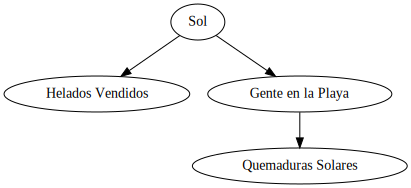

In [1]:
# Dibujando el DAG con Python
from graphviz import Digraph
def dibujar_dag():
    dot = Digraph()
    dot.edge('Sol', 'Helados Vendidos')
    dot.edge('Sol', 'Gente en la Playa')
    dot.edge('Gente en la Playa', 'Quemaduras Solares')
    dot.render('dag_causal', format='png', cleanup=False)
    return dot

# Ejecutar función para dibujar el DAG
dibujar_dag()

## Variables de Confusión: El enemigo invisible

Las [variables de confusión](https://en.wikipedia.org/wiki/Confounding) son las responsables de muchos malentendidos en la [inferencia causal](https://en.wikipedia.org/wiki/Causal_inference). Estas variables afectan tanto la causa como el efecto, creando una falsa impresión de relación. Son variables ocultas que pasomos por alto y confunden los resultados de nuestro modelo [causal](https://es.wikipedia.org/wiki/Causalidad_(filosof%C3%ADa)).

Por ejemplo, ¿el café mejora la salud del corazón o simplemente las personas que toman café tienden a hacer más ejercicio? El ejercicio podría ser la variable oculta que está confundiendo la relación.


## La Paradoja de Simpson: Cuando los datos nos engañan

La [paradoja de Simpson](https://en.wikipedia.org/wiki/Simpson%27s_paradox) ocurre cuando una tendencia que aparece en varios grupos desaparece o se invierte al analizar los datos en conjunto. Esta paradoja es una gran advertencia para cualquiera que realice [inferencia causal](https://en.wikipedia.org/wiki/Causal_inference). Para entenderla mejor, recurramos a su ejemplo clásico.

**Ejemplo clásico:** Imagina que dos hospitales tratan pacientes con una nueva terapia. Al analizar los datos de cada hospital por separado, parece que la terapia es efectiva. Sin embargo, al combinar los datos de ambos hospitales, el efecto se invierte y la terapia parece perjudicial. ¿Cómo es posible?

Esto puede suceder porque los hospitales pueden tener diferentes tasas de admisión para pacientes graves. Si un hospital recibe más pacientes críticos, sus resultados pueden parecer peores en general, a pesar de que la terapia sea beneficiosa.

**Lección clave:** Siempre debemos analizar si hay subgrupos ocultos que podrían estar sesgando nuestros resultados. Los [diagramas causales](https://es.wikipedia.org/wiki/Grafo_ac%C3%ADclico_dirigido) y la identificación de [variables de confusión](https://en.wikipedia.org/wiki/Confounding) son esenciales para evitar caer en esta trampa.


## AB Testing y Randomizacion: Las herramientas de oro para la Causalidad

La herramienta por excelencia para probar si una acción específica causa un resultado, es el [AB Testing](https://es.wikipedia.org/wiki/Prueba_A/B). Es una técnica muy sencilla que consite en realizar [experimentos aleatorios](https://es.wikipedia.org/wiki/Experimento_aleatorio) entre una variante A y una variante B.

Imaginemos que tienemos una tienda online y quieremos saber qué botón de *"Comprar"* funcionará mejor:

* Un botón verde que dice *"Comprar"*
* Un botón rojo que dice *"¡Llévalo ya!"*

El AB testing es como hacer un experimento donde:

- Divides a tus visitantes en dos grupos al azar (esto es la **[randomización](https://es.wikipedia.org/wiki/Aleatorizaci%C3%B3n))**
- Al grupo A les muestras el botón verde
- Al grupo B les muestras el botón rojo
- Después de un tiempo, comparas cuál botón generó más ventas

La **[randomización](https://es.wikipedia.org/wiki/Aleatorizaci%C3%B3n) (división al azar)** es super importante porque nos asegura que cualquier diferencia entre los grupos se debe a la *intervención* que queremos probar y no a otros factores ocultos. Sin **[randomización](https://es.wikipedia.org/wiki/Aleatorizaci%C3%B3n)**, los resultados pueden estar sesgados. 
Por ejemplo, si mostraramos el botón verde solo por las mañanas y el rojo por las tardes, no sabríamos si las diferencias en ventas son por el color del botón o porque la gente compra más a ciertas horas del día.


## Ejemplo práctico con DoWhy: Analizando la relación entre estudio y notas

Por último para cerrar y asimilar los conceptos, usaremos la librería [DoWhy](https://www.pywhy.org/dowhy/v0.12/) en [Python](https://www.python.org/) para analizar un ejemplo práctico: Intentaremos responder la pregunta ¿Estudiar más; causa mejores notas?


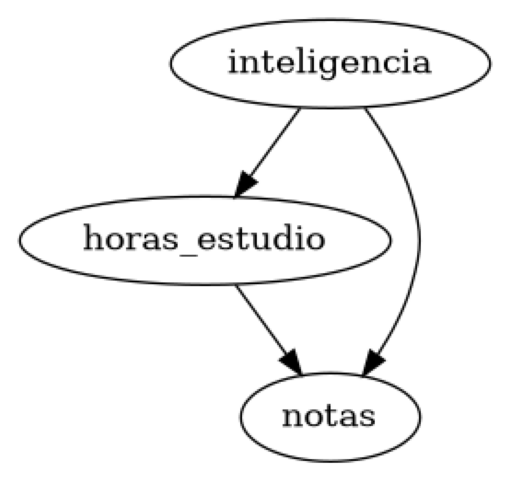

Efecto causal estimado:  9.036238221417607


In [2]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

# Simulación de datos
data = pd.DataFrame({
    "horas_estudio": np.random.normal(5, 2, 1000),
    "notas": np.random.normal(70, 10, 1000),
    "inteligencia": np.random.normal(100, 15, 1000)  # Variable de confusión
})

# Convertimos horas de estudio a binario (0: menos de 5 horas, 1: 5 o más horas)
data["horas_estudio"] = (data["horas_estudio"] >= 5).astype(int)

# Añadimos relación causal artificial
data["notas"] += data["horas_estudio"] * 10 + data["inteligencia"] * 0.5

# Definir el modelo causal
modelo = CausalModel(
    data=data,
    treatment="horas_estudio",
    outcome="notas",
    common_causes=["inteligencia"]  # Añadimos la confusión
)

modelo.view_model()

# Estimar el efecto causal
estimacion = modelo.identify_effect()
resultado = modelo.estimate_effect(estimacion, method_name="backdoor.propensity_score_matching")

print("Efecto causal estimado: ", resultado.value)

Este resultado nos indica que, en promedio, los estudiantes que estudian 5 horas o más (frente a los que estudian menos de 5 horas) obtienen aproximadamente 9.03 puntos adicionales en sus notas.
Si buscamos mejorar las calificaciones, incrementar el tiempo de estudio puede ser una estrategia efectiva.
Es importante tener en cuenta que este resultado se basa en datos simulados y el modelo está diseñado con un efecto causal artificial, por lo que no debe ser tomado como un reflejo de la realidad. Aunque siempre es recomendado dedicar una buena parte del tiempo al estudio si queremos mejorar las calificaciones! ;)

Saludos!

*Este post fue escrito por [Raúl e. López Briega](https://relopezbriega.github.io/) utilizando [Jupyter notebook](https://jupyter.org/). Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/CausalPy.ipynb) o ver su version estática en [nbviewer](https://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/CausalPy.ipynb).*